In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import mglearn

import warnings

np.set_printoptions(3)
warnings.filterwarnings('ignore')

/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 模型评估示例

- 数据集的划分
- 评估函数

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 创建一个模拟数据集
X, y = make_blobs(random_state=0)
# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 实例化模型并预测
logreg = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_train, y_train)
# 在测试集上评估模型
score = logreg.score(X_test, y_test)
print('Test score:', score)

Test score: 0.88


# 交叉验证

优点

- 每个样例都能在测试集中出现一次
- 查看模型对训练集选择的依赖程度信息
- 更加高效地利用数据

缺点

- 增加计算成本

交叉验证主要用于评估算法训练后的泛化能力

## k折交叉验证（k-fold cross validation）

- 将数据划分为大致相等的k部分，每一部分叫做折（fold）
- 依次取第i折作为测试集，$i \in \{1, 2, 3, ..., k\}$, 其余折作为训练集
- 重复k次训练，验证过程，获取每一次验证的分数

交叉验证示意

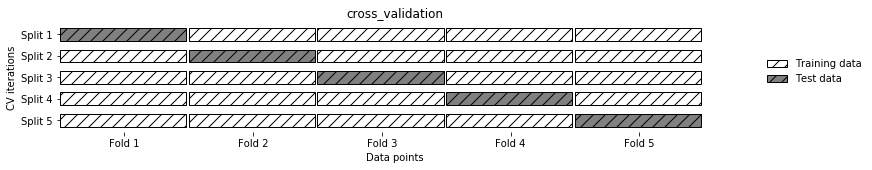

In [3]:
mglearn.plots.plot_cross_validation()

sklearn中的交叉验证：**cross_val_score**

In [4]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

print('Iris labels:\n', iris.target)

kfold = KFold(n_splits=3)
print('Cross validation scores:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

kfold = KFold(n_splits=5)
print('Cross validation scores:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

# 使用shuffle使数据均匀分布
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('Cross validation scores:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Iris labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Cross validation scores:
 [0. 0. 0.]
Cross validation scores:
 [1.    0.933 0.433 0.967 0.433]
Cross validation scores:
 [0.9  0.96 0.96]


## 分层k折交叉验证（stratified k-fold cross-validation）

分层k折交叉验证示例

- 按照分类分折

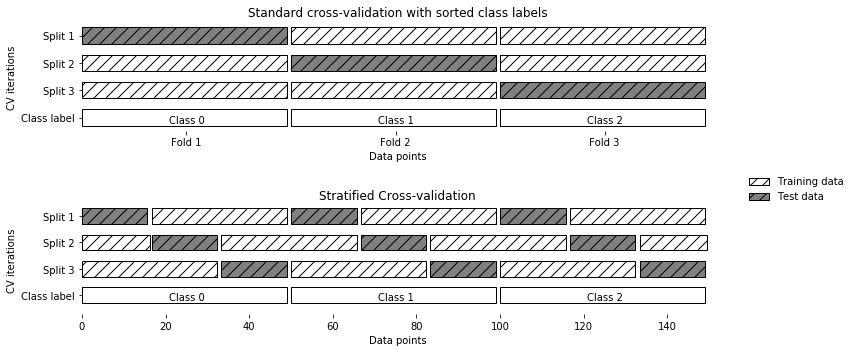

In [5]:
mglearn.plots.plot_stratified_cross_validation()

计算k折交叉验证分数， 默认为3折(这里为使用分层交叉验证的结果，在分类中默认为分层交叉验证，回归中默认为普通交叉验证)

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross validation scores:', scores)
# 计算5折交叉验证分数
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Cross validation scores:', scores)

# 使用平均值表示交叉验证的精度
print('Average cross-validation score:', scores.mean())

Cross validation scores: [0.961 0.922 0.958]
Cross validation scores: [1.    0.967 0.933 0.9   1.   ]
Average cross-validation score: 0.9600000000000002


## 留一法交叉验证(Leave-one-out cross-validation)

可以看作是每折只包含单个样本的k折交叉验证

In [7]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('num of samples:', len(iris.target))
print('num of of cv iterations', len(scores))
print('mean accuracy:', scores.mean())

num of samples: 150
num of of cv iterations 150
mean accuracy: 0.9533333333333334


## 打乱划分交叉验证(shuffle-split cross-validation)

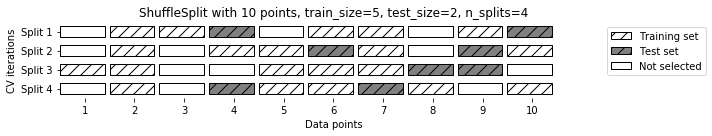

In [8]:
mglearn.plots.plot_shuffle_split()

In [9]:
from sklearn.model_selection import ShuffleSplit

# 测试集，训练集各50%， 划分10次
shuffle_split = ShuffleSplit(train_size=0.7, n_splits=10, random_state=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-validation scores:', scores)

Cross-validation scores: [0.933 0.867 0.889 0.933 0.911 0.956 0.933 0.933 1.    0.956]


## 分组交叉验证

一个分组的数据会同时出现在训练集或数据集中

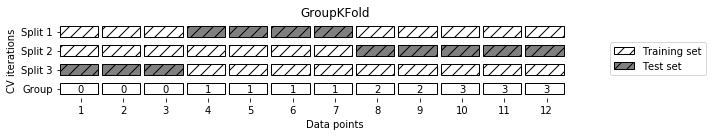

In [10]:
mglearn.plots.plot_group_kfold()

In [11]:
from sklearn.model_selection import GroupKFold

# 创建模拟数据集
X, y = make_blobs(n_samples=12, random_state=0)
# 标记分组信息
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('Cross validation scores:\n', scores)

Cross validation scores:
 [0.75  0.8   0.667]


# 网格搜索（Grid search）

尝试我们关心参数的所有可能组合

例如，在RBF核的SVM运行中，需要关心的参数及范围：

- 核宽度 gamma:[0.001, 0.01, 0.1, 1, 10, 100]
- 正则化参数C：[0.001, 0.01, 0.1, 1, 10, 100]

## 简单网格搜索

使用2个for循环组合不同参数

In [12]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('Size of training set:', X_train.shape[0], 'Size of test set:', X_test.shape[0])

scores = []
parameters = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma in parameters:
    for C in parameters:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        scores.append(svm.score(X_test, y_test))

print('scores:\n', ['{:.3f}'.format(score) for score in scores])
print('best score:', max(scores))
print('max gamma:', parameters[np.argsort(scores)[-1] // 6],
      'max C:', parameters[np.argsort(scores)[-1] % 6])

Size of training set: 112 Size of test set: 38
scores:
 ['0.237', '0.237', '0.237', '0.579', '0.921', '0.974', '0.237', '0.237', '0.579', '0.921', '0.974', '0.974', '0.237', '0.237', '0.921', '0.974', '0.974', '0.947', '0.237', '0.237', '0.974', '0.974', '0.974', '0.974', '0.237', '0.237', '0.289', '0.921', '0.921', '0.921', '0.237', '0.237', '0.237', '0.342', '0.447', '0.447']
best score: 0.9736842105263158
max gamma: 0.1 max C: 1


## 参数过拟合的风险与验证集

网格搜索中使用测试集进行调参，因此，测试机中的评分不适合用于评估模型的好坏


解决的方法是引入验证集

- 测试集: 用于模型训练
- 验证集: 基于该集合调参
- 测试集: 评估模型

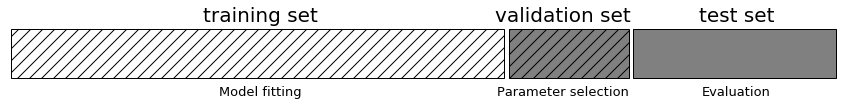

In [13]:
mglearn.plots.plot_threefold_split()

利用验证集找到一个最佳参数后，可以在训练集和验证集上训练最终的模型

In [14]:
from sklearn.svm import SVC
# 4:2:2划分
# 训练 + 验证 与 测试集
X_train_val, X_test, y_train_val, y_test = train_test_split(iris.data, iris.target, random_state=0, test_size=0.2)
# 训练集 与 验证集
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0, test_size=0.25)

print('number of samples', iris.target.shape[0],
      'Size of training set:', X_train.shape[0],
      'Size of validation set:', X_val.shape[0],
      'Size of test set:', X_test.shape[0])

scores = []
parameters = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma in parameters:
    for C in parameters:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        scores.append(svm.score(X_val, y_val))

print('best validation score:', max(scores))
best_gamma = parameters[np.argsort(scores)[-1] // 6]
best_C = parameters[np.argsort(scores)[-1] % 6]

svm = SVC(gamma=best_gamma, C=best_C).fit(X_train_val, y_train_val)
print('best test score:', svm.score(X_test, y_test))
print('best_gamma:', best_gamma, 'best_C:', best_C)

number of samples 150 Size of training set: 90 Size of validation set: 30 Size of test set: 30
best validation score: 0.9333333333333333
best test score: 1.0
best_gamma: 0.1 best_C: 100


## 带交叉验证的网格搜索

交叉验证以获取最佳的评估

In [15]:
scores = []

for gamma in parameters:
    for C in parameters:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        kfold_scores = cross_val_score(svm, X_train_val, y_train_val, cv=5)
        scores.append(kfold_scores.mean())

best_gamma = parameters[np.argsort(scores)[-1] // 6]
best_C = parameters[np.argsort(scores)[-1] % 6]
print('best validation score:', max(scores))
print('best_gamma:', best_gamma, 'best_C:', best_C)

best validation score: 0.9585757575757576
best_gamma: 0.1 best_C: 10


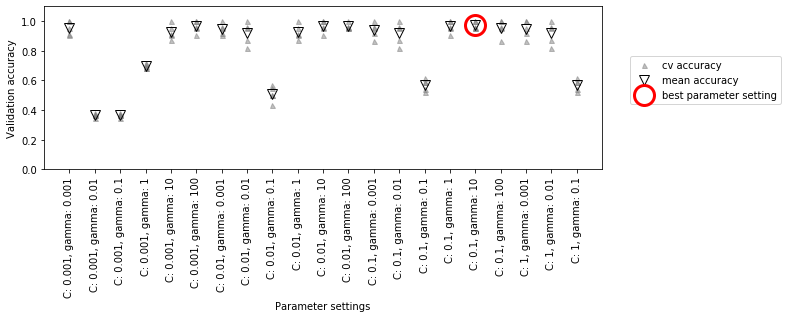

In [16]:
# 图中展示不完全
mglearn.plots.plot_cross_val_selection()

交叉验证通常与网格搜索结合，其流程如下

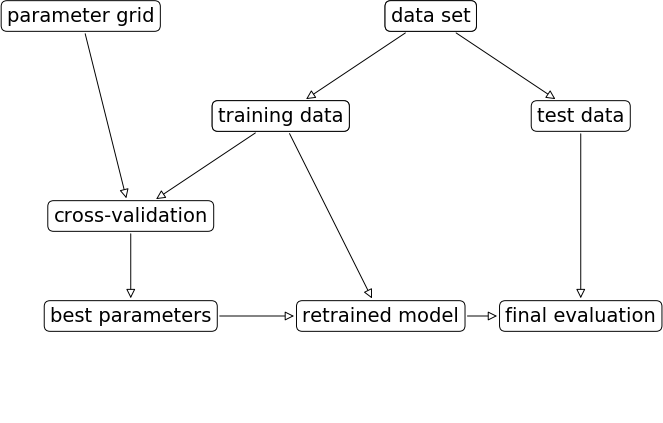

In [17]:
mglearn.plots.plot_grid_search_overview()

## sklearn 中的网格搜索类

In [18]:
# 设置参数
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

from sklearn.model_selection import GridSearchCV

# 创建网格交叉验证的实例
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)

# 划分训练集，测试集（网格搜索中将训练集和验证集合并为训练集）
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# 添加训练数据
grid_search.fit(X_train, y_train)

print('Best cross validation score:', grid_search.best_score_)
print('Best test score:', grid_search.score(X_test, y_test))
print('Best parameters:', grid_search.best_params_)

Best cross validation score: 0.9732142857142857
Best test score: 0.9736842105263158
Best parameters: {'C': 100, 'gamma': 0.01}


访问最佳estimator的参数, 该estimator基于所有数据训练

In [19]:
print('Best estimator:\n', grid_search.best_estimator_)

Best estimator:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### 分析交叉验证的结果

In [20]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000666,0.000050,0.000247,0.000040,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,34
1,0.000602,0.000009,0.000228,0.000017,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,34
2,0.000747,0.000113,0.000331,0.000084,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,34
3,0.000625,0.000008,0.000226,0.000011,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,34
4,0.000611,0.000006,0.000220,0.000003,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,34


网格热图可视化

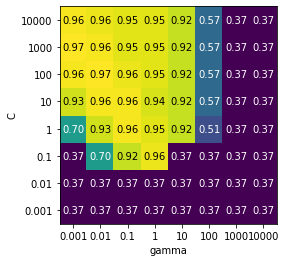

In [21]:
scores = np.array(results.mean_test_score).reshape(8, 8)
# 对交叉验证的平均分数作图
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')
plt.show()

错误的网格热图可视化

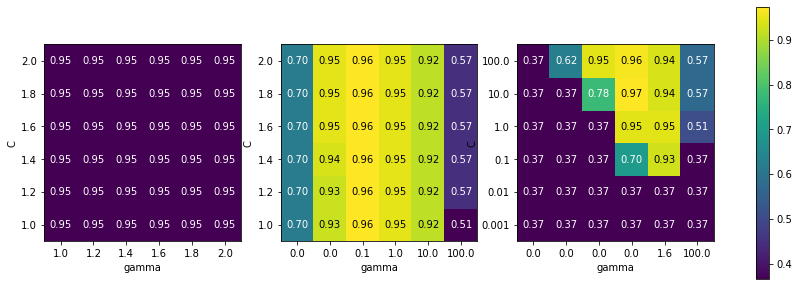

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                   'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
               'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                  'gamma': np.logspace(-7, 2, 6)}

a = param_grid_range['gamma']
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # 对交叉验证的平均分数作图
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma',
                                         xticklabels=['{:.1f}'.format(ele) for ele in param_grid['gamma']],
                                         ylabel='C', yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax= axes.tolist())
plt.show()

### 在非网格的空间中搜索

SCV()类中，不同核的参数需要不同：

- `linear`核: 只需要设置C参数
- `rbf`核: 需要设置参数gamma和C

In [23]:
param_grid = [{'kernel': ['rbf'],
               'C': parameters,
               'gamma': parameters},
              {'kernel': ['linear'],
               'C': parameters}
             ]

In [24]:
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best cross validation score:', grid_search.best_score_)
print('Best test score:', grid_search.score(X_test, y_test))
print('Best parameters:', grid_search.best_params_)

Best cross validation score: 0.9732142857142857
Best test score: 0.9736842105263158
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [25]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000747156,0.000653028,0.000613642,0.000587177,0.000473166,0.000517225,0.000462627,0.000481558,0.000485563,0.000568628,...,0.000305128,0.000427151,0.000730896,0.000773668,0.000395012,0.000357676,0.00030961,0.000292301,0.000291586,0.000307655
std_fit_time,0.000140772,0.000116844,7.0249e-06,5.31068e-05,5.37495e-06,6.89784e-06,5.30469e-06,1.53527e-05,5.95684e-06,8.25975e-05,...,1.07995e-05,1.18929e-05,2.60104e-05,1.67525e-05,4.20429e-06,1.9216e-06,3.87267e-06,7.48194e-06,1.18281e-05,2.85532e-05
mean_score_time,0.000260448,0.000251007,0.000223923,0.000212717,0.000189924,0.000197792,0.000185347,0.000197363,0.000191164,0.000220156,...,0.000172138,0.000184155,0.000215483,0.000223827,0.000180435,0.000175524,0.000168228,0.000165319,0.000159693,0.000163174
std_score_time,5.07899e-05,3.70679e-05,4.33738e-06,1.3644e-05,4.83373e-06,2.62304e-06,1.55686e-06,1.35705e-05,5.20255e-06,2.89604e-05,...,2.41733e-06,1.96952e-06,5.86994e-06,3.305e-06,4.96781e-06,1.8676e-06,6.14362e-07,4.55273e-06,8.71452e-07,1.23057e-06
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


### 使用不同的交叉验证策略进行网格搜索

GrandSearchCV默认在分类中使用分层k折交叉验证，在回归中使用普通k折交叉验证

- 交叉验证：用于评估模型
- 网格搜索：用于找出最优参数（训练模型）

可以使用网格搜索训练模型，并使用k折交叉验证评估：

In [26]:
# 使用5折划分数据集
# 在每一折上使用5折交叉验证的网格搜索比较得到最佳模型
# 在每折的测试集上测试网格搜索得到的模型
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv = 5)
print('cross validation score:', scores)
print('mean cross validation score:', scores.mean())

cross validation score: [0.967 1.    0.9   0.967 1.   ]
mean cross validation score: 0.9666666666666668


In [27]:
for ele in param_grid:
    print(ele)

{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


上述代码的实现细节如下

In [28]:
def nested_cv(X, y, inner_cv, outter_cv, Classifier, param_grid):
    outter_scores = []
    # 对于外层交叉验证的每次划分，split返回索引值
    for training_samples, test_samples in outter_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        
        for parameters in param_grid:
            # 在内层划分中累加分数
            cv_scores = []
            # 便利内层交叉验证
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # 使用给定的参数和训练数据来构建分类器
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                cv_scores.append(clf.score(X[inner_test], y[inner_test]))
            
            # 计算内层交叉验证的平均分数
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        
        # 利用外层训练集和最佳参数来构建模型
        clf = Classifier(** best_params)
        clf.fit(X[training_samples], y[training_samples])
        outter_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outter_scores)

In [29]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('cross validation score:', scores)
print('mean cross validation score:', scores.mean())

cross validation score: [0.967 1.    0.967 0.967 1.   ]
mean cross validation score: 0.9800000000000001


# 评估指标与评分

下面多数指标以二分类中的评估指标为例

## 错误类型

假正例（false positive）:错误地预测了正例  
假反例（false negative）:错误地预测了反例

## 不平衡数据集

不平衡的数据集造成score不能真实反应模型的能力，因为按照概率随机预测或按最常见的标签预测也可以得到很高的分数

In [30]:
from sklearn.datasets import load_digits

# 将数字数据集划分为9与非9两个类型
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# 按最多标签进行预测
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('most_frequent test score:', dummy_majority.score(X_test, y_test))

# 按标签分布进行预测（概率随机预测）
dummy_majority = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_stratified = dummy_majority.predict(X_test)
print('stratified test score:', dummy_majority.score(X_test, y_test))

# 简单决策树预测
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('decision tree test score:', tree.score(X_test, y_test))

# 罗杰斯特回归预测
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_log = logreg.predict(X_test)
print('logistic regression test score:', logreg.score(X_test, y_test))

most_frequent test score: 0.8955555555555555
stratified test score: 0.8244444444444444
decision tree test score: 0.9177777777777778
logistic regression test score: 0.9777777777777777


## 混淆矩阵（confusion matrix）

矩阵展示预测情况，在二分类中为：

- TP(true positive)真正例
- FP(false positive)假正例
- TN(true negative)真反例
- FN(false negative)假反例

In [32]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log)
print('confusion metrix:\n', confusion)

confusion metrix:
 [[401   2]
 [  8  39]]


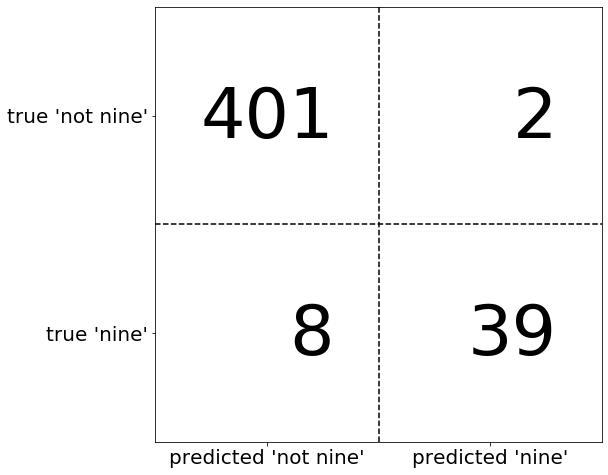

In [33]:
# digit混淆矩阵的含义
mglearn.plots.plot_confusion_matrix_illustration()

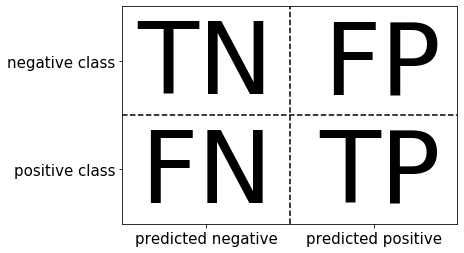

In [34]:
# 混淆矩阵的几种含义
mglearn.plots.plot_binary_confusion_matrix()

分析上述几种方法的混淆矩阵

In [35]:
print('Most frequent classifier:')
print(confusion_matrix(y_test, pred_most_frequent))
print('stratified classifier:')
print(confusion_matrix(y_test, pred_stratified))
print('tree classifier:')
print(confusion_matrix(y_test, pred_tree))
print('logistic regression classifier:')
print(confusion_matrix(y_test, pred_log))

Most frequent classifier:
[[403   0]
 [ 47   0]]
stratified classifier:
[[368  35]
 [ 43   4]]
tree classifier:
[[390  13]
 [ 24  23]]
logistic regression classifier:
[[401   2]
 [  8  39]]


## 精度（Accuracy）的表示

总预测数量中预测正确的数量的比例
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

## 准确率（Precision）的表示

预测为正例的样本中真正例的比例，也叫查准率
$$
Precision = \frac{TP}{TP + FP}
$$

## 召回率（Recall）的表示

正例样本中预测为正例的比例，也叫查全率
$$
Recall = \frac{TP}{TP + FN}
$$

## f-score的表示

综合准确率和召回率的表示
$$
F-score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

f-score评估上述几种分类器的表现

In [36]:
from sklearn.metrics import f1_score
print('f1 Most frequent classifier:', f1_score(y_test, pred_most_frequent))
print('f1 stratified classifier:', f1_score(y_test, pred_stratified))
print('f1 tree classifier:', f1_score(y_test, pred_tree))
print('f1 logistic regression classifier:', f1_score(y_test, pred_log))

f1 Most frequent classifier: 0.0
f1 stratified classifier: 0.09302325581395349
f1 tree classifier: 0.5542168674698795
f1 logistic regression classifier: 0.8863636363636364


classification_report 全面分析各项指标

In [37]:
from sklearn.metrics import classification_report
print('pred_most_frequent\n',
      classification_report(y_test, pred_most_frequent, target_names = ['not nine', 'nine']))

print('pred_stratified\n',
      classification_report(y_test, pred_stratified, target_names = ['not nine', 'nine']))

print('pred_log\n',
      classification_report(y_test, pred_log, target_names = ['not nine', 'nine']))

pred_most_frequent
               precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

pred_stratified
               precision    recall  f1-score   support

    not nine       0.90      0.91      0.90       403
        nine       0.10      0.09      0.09        47

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.83      0.82       450

pred_log
               precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98    

## 考虑不确定性

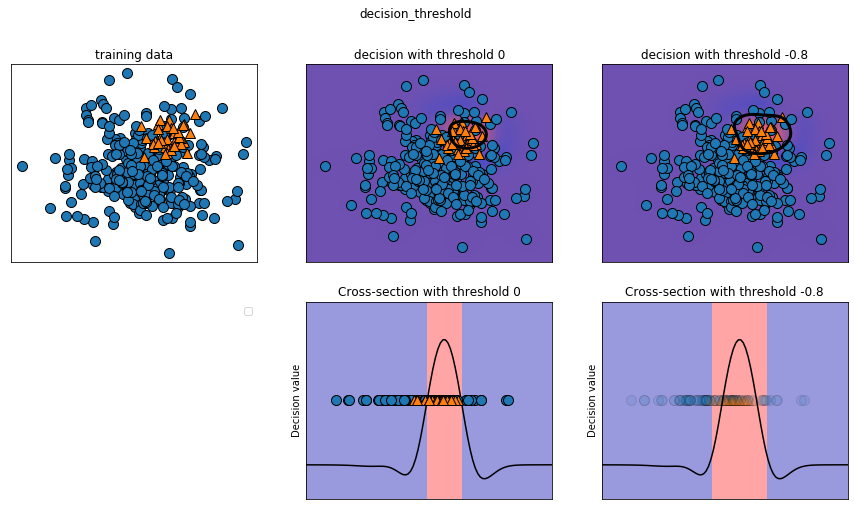

In [38]:
mglearn.plots.plot_decision_threshold()

In [39]:
from mglearn.datasets import make_blobs

# 构造数据集
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 训练分类器
svc = SVC(gamma=0.05).fit(X_train, y_train)
# 评估模型性能
print('Model report\n', classification_report(y_test, svc.predict(X_test)))

# 预测时取较大的阈值
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8
print('Model report\n', classification_report(y_test, y_pred_lower_threshold))

Model report
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113

Model report
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



## 准确率-召回率(PR)曲线

###  precision-recall curve(PR曲线)的绘制

sklearn 使用 precision_recall_curve 计算所有decision_function中出现的所有阈值的P、R值，

In [40]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

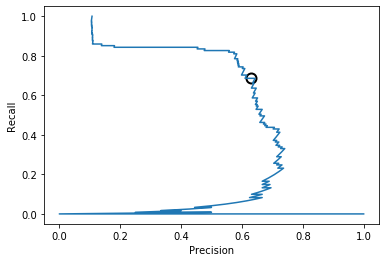

In [41]:
# 使用更多数据点得到更加平滑的曲线

X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC().fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero',
         fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

### RandomForestClassifier 与 SVC 的PR曲线对比

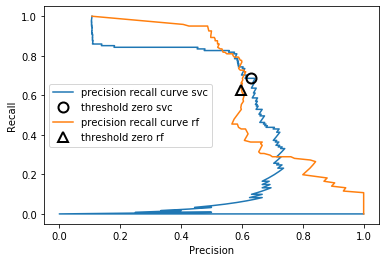

f1_score of random forest:0.610
f1_score of svc:0.656


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier 只有predict_proba，没有decision finction
precision_rf, recall_rf, thresholed_rf = precision_recall_curve(y_test,
                                                                rf.predict_proba(X_test)[:, 1])
close_default_rf = np.argmin(np.abs(thresholed_rf - 0.5))

plt.plot(precision, recall, label='precision recall curve svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='precision recall curve rf')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf],
         '^', markersize=10, label='threshold zero rf',
         fillstyle='none', c='k', mew=2)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

print('f1_score of random forest:{:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc:{:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

### PR曲线的面积，平均准确率

In [43]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('Average precision of random forest:', ap_rf)
print('Average precision of svc:', ap_svc)

Average precision of random forest: 0.659559370099291
Average precision of svc: 0.5671127001259444


## 受试者工作特征曲线（ROC）与AUC

**受试者工作特征曲线**(Receiver operating characteristics curve) 简称**ROC曲线**

反映真正例率和假正例率随阈值变化

**真正例率**（True positive rate，TPR）真正例占所有正例样本的比例,也就是召回率
$$
TPR = \frac{TP}{TP + FN}
$$

**假正例率**（False positive rate，FPR）假正例占所有反例样本的比例
$$
FPR = \frac{FP}{FP + TN}
$$

### 绘制ROC曲线

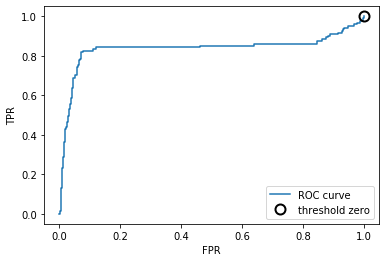

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)
plt.show()

### RF与SVC的ROC曲线对比

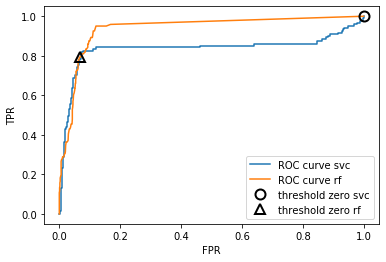

In [48]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
close_default_rf = np.argmin(np.abs(thresholds - 0.5))

plt.plot(fpr, tpr, label='ROC curve svc')
plt.plot(fpr_rf, tpr_rf, label='ROC curve rf')

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero svc', fillstyle='none', c='k', mew=2)
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label='threshold zero rf', fillstyle='none', c='k', mew=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

### 曲线面积AUC(Area under the curve)

In [49]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('AUC score of random forest:', rf_auc)
print('AUC score of svc:', svc_auc)

AUC score of random forest: 0.9366953672911659
AUC score of svc: 0.8356573705179284


### 对数字分类使用AUC评估

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.15 accuracy = 0.90 AUC = 0.79
gamma = 0.01 accuracy = 0.90 AUC = 1.00


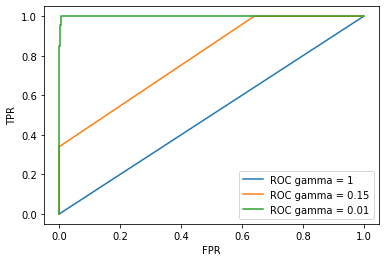

In [55]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

for gamma in [1, 0.15, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}'.format(gamma, accuracy, auc))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    plt.plot(fpr, tpr, label='ROC gamma = {}'.format(gamma))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

## 多分类指标

指标在多分类任务下的含义

In [57]:
# 正常的数字多分类任务

from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of logistic regression:', accuracy)
print('Confusion metrics:\n', confusion_matrix(y_test, pred))

Accuracy of logistic regression: 0.9533333333333334
Confusion metrics:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


混淆矩阵可视化

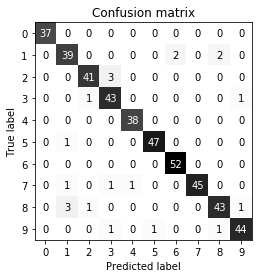

In [62]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label',
                                     ylabel='True label', xticklabels=digits.target_names,
                                     yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('Confusion matrix')
plt.gca().invert_yaxis()
plt.show()

查看每个分类上的评估指标

- 常用的指标为计算每个分类上的f-score
- 将对应的分类看最正类，其他分类看做反类
- 计算该分类上的f-score

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



每个分类的f-score汇总为多分类的f-score, 策略有:

- macro 平均：每个类f-score的简单平均
- weighted 平均：每个类f-score的加权平均
- micro 平均: 计算全部分类的假正例、假反例，真正例，计算f-score

In [64]:
print('micro average f1 score:', f1_score(y_test, pred, average='macro'))
print('weighted average f1 score:', f1_score(y_test, pred, average='weighted'))
print('micro average f1 score:', f1_score(y_test, pred, average='micro'))

micro average f1 score: 0.9539995483362096
weighted average f1 score: 0.9533352843608719
micro average f1 score: 0.9533333333333334


## 回归指标

- 对于大多数任务，默认的$R^2$指标已经足够了
- $R^2$指标为回归模型默认的score分数指标
- 其他类似的指标还有均方误差，平均绝对误差

## 在模型选择中使用评估指标

### 可选评估指标

可以在交叉验证或网格搜索中使用 scoring参数指定评估的指标，常见的评估指标有

In [81]:
from sklearn.metrics import scorer
print('Avilable scorers:\n', sorted(scorer.SCORERS.keys()))

Avilable scorers:
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


### 在交叉验证中使用不同的指标

In [71]:
# 分类的默认评分是精度
print('Default scoring:{}'.format(cross_val_score(SVC(), digits.data, digits.target == 9)))

# 指定评估指标为accuracy
print('Accuracy scoring:{}'.format(cross_val_score(SVC(),
                                                  digits.data,
                                                  digits.target == 9,
                                                  scoring = 'accuracy')))

# 指定评估指标为roc_auc
print('roc auc scoring:{}'.format(cross_val_score(SVC(),
                                                  digits.data,
                                                  digits.target == 9,
                                                  scoring = 'roc_auc')))

Default scoring:[0.9 0.9 0.9]
Accuracy scoring:[0.9 0.9 0.9]
roc auc scoring:[0.994 0.99  0.996]


### 在网格搜索中使用不同的指标

In [75]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid).fit(X_train, y_train)
print('Grid search with accureacy')
print('Best parameters:', grid.best_params_)
print('Best cross validation score(accuracy):', grid.best_score_)
print('Test set AUC:', roc_auc_score(y_test, grid.decision_function(X_test)))
print('Test set accuracy', grid.score(X_test, y_test))

Grid search with accureacy
Best parameters: {'gamma': 0.0001}
Best cross validation score(accuracy): 0.9703043801039347
Test set AUC: 0.9919222849902327
Test set accuracy 0.9733333333333334


In [76]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc').fit(X_train, y_train)
print('Grid search with roc_auc')
print('Best parameters:', grid.best_params_)
print('Best cross validation score(AUC):', grid.best_score_)
print('Test set AUC:', roc_auc_score(y_test, grid.decision_function(X_test)))
print('Test set accuracy', grid.score(X_test, y_test))

Grid search with roc_auc
Best parameters: {'gamma': 0.01}
Best cross validation score(AUC): 0.997467845027512
Test set AUC: 0.999524840293543
Test set accuracy 0.999524840293543
